## Model Selection

This notebook should include preliminary and baseline modeling.
- Try as many different models as possible.
- Don't worry about hyperparameter tuning or cross validation here.
- Ideas include:
    - linear regression
    - support vector machines
    - random forest
    - xgboost

In [261]:
#Import preprocessed data
import pandas as pd

#Independant variable training data
X_train = pd.read_csv("../data/preprocessed/X_train_scaled.csv")
X_train = X_train.drop(columns=["Unnamed: 0"])
print(f"X_train shape: {X_train.shape}")

#Target training data
y_train = pd.read_csv("../data/preprocessed/y_train.csv")
y_train = y_train.drop(columns=["Unnamed: 0"])
print(f"y_train shape: {y_train.shape}")

#Independant variable test data
X_test = pd.read_csv("../data/preprocessed/X_test_scaled.csv")
X_test = X_test.drop(columns=["Unnamed: 0"])
print(f"X_test shape: {X_test.shape}")

#Target test data
y_test = pd.read_csv("../data/preprocessed/y_test.csv")
y_test = y_test.drop(columns=["Unnamed: 0"])
print(f"y_test shape: {y_test.shape}")


X_train shape: (3381, 34)
y_train shape: (3381, 1)
X_test shape: (1450, 34)
y_test shape: (1450, 1)


In [262]:
#Create function to get all error scores at once
def get_error_scores (y_train, y_train_pred, y_test, y_test_pred, error_type='All', num_results=10):
    # Check performance on train and test set
    from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
    import numpy as np

    if (error_type == 'All' or LOWER(error_type) == 'r2'):
        #Using R2
        r2_train = round(r2_score(y_train, y_train_pred),4)
        r2_test = round(r2_score(y_test, y_test_pred),4)

        print(f'R SQUARED\n\tTrain R²:\t{r2_train}\n\tTest R²:\t{r2_test}')

    if (error_type == 'All' or LOWER(error_type) == 'mae'):
        #Using Mean Average Error
        MAE_train = round(mean_absolute_error(y_train, y_train_pred),2)
        MAE_test = round(mean_absolute_error(y_test, y_test_pred),2)

        print(f'MEAN AVERAGE ERROR\n\tTrain MAE:\t{MAE_train}\n\tTest MAE:\t{MAE_test}')

    if (error_type == 'All' or LOWER(error_type) == 'rmse'):
        #Using Root Mean Squared Error
        RMSE_train = round(np.sqrt(mean_squared_error(y_train, y_train_pred)),2)
        RMSE_test = round(np.sqrt(mean_squared_error(y_test, y_test_pred)),2)

        print(f'ROOT MEAN SQUARED ERROR\n\tTrain RMSE:\t{RMSE_train}\n\tTest RMSE:\t{RMSE_test}\n')

    if (error_type == 'All'):
        display_results_sample(y_test, y_test_pred, num_results)



In [279]:
#Function to demonstrate of prediction
def display_results_sample (y_test, y_test_prediction, num_results=10):
    import random

    print(f"{num_results} Randomly selected results.")

    sum_percentage_error = 0

    #Choose 10 rows to display
    for i in range(num_results):
        j = random.randint(0, len(y_test)-1)

        if isinstance(y_test_prediction[j], (list, tuple, np.ndarray)):
            demo_prediction = round(y_test_prediction[j][0])
        else:
            demo_prediction = round(y_test_prediction[j])
        demo_actual = round(y_test.iloc[j].item())
        demo_difference = demo_prediction - demo_actual
        demo_difference_percentage = round((demo_actual / demo_prediction - 1)*100,2)

        sum_percentage_error += abs(demo_difference_percentage)

        print(f"Index: {j} \t- \tPrediction: ${demo_prediction:,} \tActual: ${demo_actual:,} \tDifference: {demo_difference:,}, {demo_difference_percentage}%")

    average_percentage_error = round(sum_percentage_error / num_results,2)
    print(f"\t\t\t\t\t\t\t\t\tAverage % error = {average_percentage_error}%")


Consider what metrics you want to use to evaluate success.
- If you think about mean squared error, can we actually relate to the amount of error?
- Try root mean squared error so that error is closer to the original units (dollars)
- What does RMSE do to outliers?
- Is mean absolute error a good metric for this problem?
- What about R^2? Adjusted R^2?
- Briefly describe your reasons for picking the metrics you use

In [288]:
# Train our Linear Regression model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

#Get predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

get_error_scores (y_train, y_train_pred, y_test, y_test_pred)

R SQUARED
	Train R²:	0.7374
	Test R²:	0.7271
MEAN AVERAGE ERROR
	Train MAE:	69045.11
	Test MAE:	69106.02
ROOT MEAN SQUARED ERROR
	Train RMSE:	94173.5
	Test RMSE:	95747.86

10 Randomly selected results.
Index: 676 	- 	Prediction: $143,842 	Actual: $115,000 	Difference: 28,842, -20.05%
Index: 1373 	- 	Prediction: $252,778 	Actual: $226,000 	Difference: 26,778, -10.59%
Index: 1118 	- 	Prediction: $493,557 	Actual: $475,000 	Difference: 18,557, -3.76%
Index: 184 	- 	Prediction: $457,896 	Actual: $750,000 	Difference: -292,104, 63.79%
Index: 700 	- 	Prediction: $407,926 	Actual: $357,000 	Difference: 50,926, -12.48%
Index: 626 	- 	Prediction: $324,631 	Actual: $206,000 	Difference: 118,631, -36.54%
Index: 1356 	- 	Prediction: $186,969 	Actual: $150,000 	Difference: 36,969, -19.77%
Index: 1390 	- 	Prediction: $135,279 	Actual: $160,000 	Difference: -24,721, 18.27%
Index: 314 	- 	Prediction: $213,259 	Actual: $195,000 	Difference: 18,259, -8.56%
Index: 799 	- 	Prediction: $161,340 	Actual: $1

In [289]:
from sklearn.preprocessing import PolynomialFeatures

# Create 2nd degree polynomial feature set and train model
poly2 = PolynomialFeatures(degree=2)
Xpoly_train = poly2.fit_transform(X_train)
Xpoly_test = poly2.transform(X_test)
print(f'Number of polynomial features: {Xpoly_train.shape[1]}')

# Train our model
reg.fit(Xpoly_train, y_train)
ypoly_train_pred = reg.predict(Xpoly_train)
ypoly_test_pred = reg.predict(Xpoly_test)

get_error_scores(y_train, ypoly_train_pred, y_test, ypoly_test_pred)

Number of polynomial features: 630
R SQUARED
	Train R²:	0.8911
	Test R²:	0.8373
MEAN AVERAGE ERROR
	Train MAE:	45371.38
	Test MAE:	54898.79
ROOT MEAN SQUARED ERROR
	Train RMSE:	60651.3
	Test RMSE:	73930.9

10 Randomly selected results.
Index: 477 	- 	Prediction: $394,945 	Actual: $385,000 	Difference: 9,945, -2.52%
Index: 778 	- 	Prediction: $539,000 	Actual: $730,000 	Difference: -191,000, 35.44%
Index: 776 	- 	Prediction: $426,494 	Actual: $599,000 	Difference: -172,506, 40.45%
Index: 123 	- 	Prediction: $170,401 	Actual: $195,000 	Difference: -24,599, 14.44%
Index: 1185 	- 	Prediction: $321,031 	Actual: $326,000 	Difference: -4,969, 1.55%
Index: 1202 	- 	Prediction: $673,631 	Actual: $705,000 	Difference: -31,369, 4.66%
Index: 165 	- 	Prediction: $421,616 	Actual: $487,000 	Difference: -65,384, 15.51%
Index: 1014 	- 	Prediction: $192,863 	Actual: $180,000 	Difference: 12,863, -6.67%
Index: 1361 	- 	Prediction: $407,017 	Actual: $325,000 	Difference: 82,017, -20.15%
Index: 1261 	- 	P

In [290]:
# Create polynomial feature set and train model
poly2 = PolynomialFeatures(degree=3)
Xpoly_train = poly2.fit_transform(X_train)
Xpoly_test = poly2.transform(X_test)
print(f'Number of polynomial features: {Xpoly_train.shape[1]}')

# Train our model
reg.fit(Xpoly_train, y_train)
ypoly_train_pred = reg.predict(Xpoly_train)
ypoly_test_pred = reg.predict(Xpoly_test)

# Check performance on train and test set
get_error_scores(y_train, ypoly_train_pred, y_test, ypoly_test_pred)

Number of polynomial features: 7770
R SQUARED
	Train R²:	1.0
	Test R²:	0.9693
MEAN AVERAGE ERROR
	Train MAE:	0.0
	Test MAE:	4554.24
ROOT MEAN SQUARED ERROR
	Train RMSE:	0.0
	Test RMSE:	32094.95

10 Randomly selected results.
Index: 228 	- 	Prediction: $415,000 	Actual: $415,000 	Difference: 0, 0.0%
Index: 1427 	- 	Prediction: $299,000 	Actual: $299,000 	Difference: 0, 0.0%
Index: 558 	- 	Prediction: $225,000 	Actual: $225,000 	Difference: 0, 0.0%
Index: 562 	- 	Prediction: $810,000 	Actual: $810,000 	Difference: 0, 0.0%
Index: 433 	- 	Prediction: $144,000 	Actual: $144,000 	Difference: 0, 0.0%
Index: 919 	- 	Prediction: $400,000 	Actual: $400,000 	Difference: 0, 0.0%
Index: 773 	- 	Prediction: $450,000 	Actual: $450,000 	Difference: 0, 0.0%
Index: 750 	- 	Prediction: $45,000 	Actual: $45,000 	Difference: 0, 0.0%
Index: 228 	- 	Prediction: $415,000 	Actual: $415,000 	Difference: 0, 0.0%
Index: 1298 	- 	Prediction: $283,500 	Actual: $283,500 	Difference: 0, 0.0%
									Average % error 

In [291]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor

In [ ]:
#Function to find best model
def find_best_regression_model (iX_train, iX_test, iy_train, iy_test):
    #import needed modules
    import numpy as np
    import pandas as pd
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    from xgboost import XGBRegressor
    from lightgbm import LGBMRegressor
    from sklearn.neural_network import MLPRegressor

    #List models to discover
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "XGBoost": XGBRegressor(),
        "LightGBM": LGBMRegressor(),
        "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500)
    }

    #Empty results dictionary
    results = {}

    # Train and evaluate models
    for name, model in models.items():
        print(f"Processing {name}")
        model.fit(iX_train, iy_train)
        iy_pred = model.predict(iX_test)
        mse = mean_squared_error(iy_test, iy_pred)
        r2 = r2_score(iy_test, iy_pred)
        
        results[name] = {"MSE": mse, "R² Score": r2}

    # Convert results to DataFrame for better visualization
    results_df = pd.DataFrame(results).T
    results_df_sorted = results_df.sort_values(by='R² Score', ascending=False)

    print(f"Processing COMPLETE!")

    return results_df_sorted

In [ ]:
model_finding_results = find_best_regression_model(X_train, X_test, y_train, y_test)

Processing Linear Regression
Processing Decision Tree
Processing Random Forest


/usr/local/Caskroom/miniforge/base/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Processing XGBoost
Processing LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1805
[LightGBM] [Info] Number of data points in the train set: 3381, number of used features: 31
[LightGBM] [Info] Start training from score 344341.797693
Processing Neural Network


/usr/local/Caskroom/miniforge/base/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Processing COMPLETE!


/usr/local/Caskroom/miniforge/base/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [294]:
model_finding_results

,MSE,R² Score
XGBoost,1.372788e+09,0.959128
LightGBM,2.155692e+09,0.935819
Random Forest,2.542771e+09,0.924294
Decision Tree,5.805151e+09,0.827164
Linear Regression,9.167652e+09,0.727053
Neural Network,9.645661e+09,0.712821


In [ ]:
# Train our XG Model model
from xgboost import XGBRegressor

xg = XGBRegressor()
xg.fit(X_train, y_train)

#Get predictions
y_xg_train_pred = xg.predict(X_train)
y_xg_test_pred = xg.predict(X_test)

get_error_scores (y_train, y_xg_train_pred, y_test, y_xg_test_pred)

R SQUARED
	Train R²:	0.9977
	Test R²:	0.9591
MEAN AVERAGE ERROR
	Train MAE:	5987.47
	Test MAE:	22881.88
ROOT MEAN SQUARED ERROR
	Train RMSE:	8823.46
	Test RMSE:	37051.15

10 Randomly selected results.
Index: 753 	- 	Prediction: $377,409 	Actual: $435,000 	Difference: -57,591, 15.26%
Index: 903 	- 	Prediction: $362,761 	Actual: $360,000 	Difference: 2,761, -0.76%
Index: 749 	- 	Prediction: $62,596 	Actual: $56,000 	Difference: 6,596, -10.54%
Index: 699 	- 	Prediction: $145,761 	Actual: $139,900 	Difference: 5,861, -4.02%
Index: 377 	- 	Prediction: $570,334 	Actual: $599,000 	Difference: -28,666, 5.03%
Index: 149 	- 	Prediction: $288,718 	Actual: $235,000 	Difference: 53,718, -18.61%
Index: 689 	- 	Prediction: $202,379 	Actual: $220,000 	Difference: -17,621, 8.71%
Index: 1379 	- 	Prediction: $399,621 	Actual: $368,000 	Difference: 31,621, -7.91%
Index: 555 	- 	Prediction: $266,107 	Actual: $280,000 	Difference: -13,893, 5.22%
Index: 884 	- 	Prediction: $524,918 	Actual: $494,000 	Differe

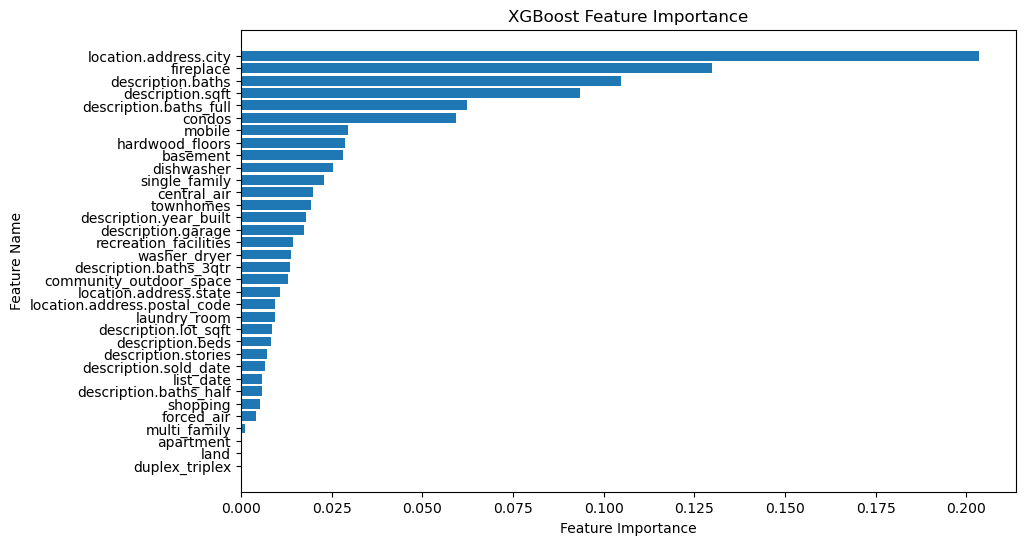

In [299]:
import matplotlib.pyplot as plt

# Get XG feature importance
importances = xg.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()
plt.show()

## Feature Selection - STRETCH

> **This step doesn't need to be part of your Minimum Viable Product (MVP), but its recommended you complete it if you have time!**

Even with all the preprocessing we did in Notebook 1, you probably still have a lot of features. Are they all important for prediction?

Investigate some feature selection algorithms (Lasso, RFE, Forward/Backward Selection)
- Perform feature selection to get a reduced subset of your original features
- Refit your models with this reduced dimensionality - how does performance change on your chosen metrics?
- Based on this, should you include feature selection in your final pipeline? Explain

Remember, feature selection often doesn't directly improve performance, but if performance remains the same, a simpler model is often preferrable. 



In [ ]:
# perform feature selection 
# refit models
# gather evaluation metrics and compare to the previous step (full feature set)